In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# helper function to print in matplotlib

def imgshow(img):
    plt.figure(figsize=(10,10))
    plt.imshow((img[:,:,::-1]))

In [3]:
car = cv2.imread('./img/cars1.jpg')
car_2 = cv2.imread('./img/cars2.jpg')
car_3 = cv2.imread('./img/cars3.jpg')

In [4]:
# ORB detecter

orb = cv2.ORB_create()

kp1, desc1 = orb.detectAndCompute(car, None)
kp2, desc2 = orb.detectAndCompute(car_3, None)

In [6]:

# Brute Force Matching

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(desc1, desc2)

matches = sorted(matches, key = lambda x: x.distance)

In [7]:

matching_result = cv2.drawMatches(car, kp1, car_3, kp2, matches[:20], None, flags=2)

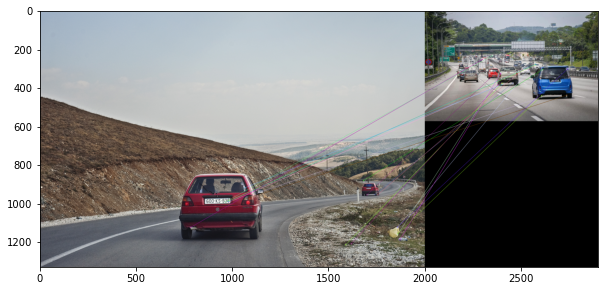

In [8]:
imgshow(matching_result)

<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-9-808dbc68848b>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if cars is ():


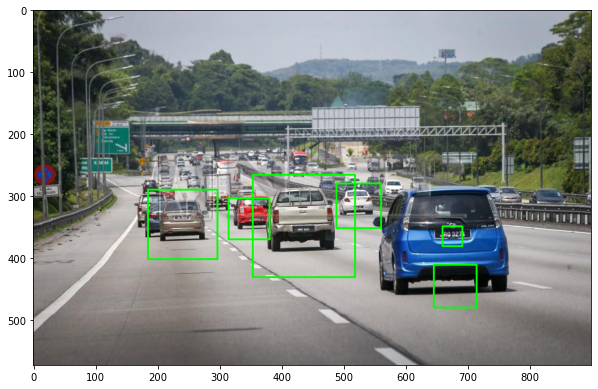

In [9]:
car_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_car.xml')

car3_gray = cv2.cvtColor(car_3, cv2.COLOR_BGR2GRAY)

cars = car_classifier.detectMultiScale(car3_gray, minNeighbors = 5)

car_copy = car_3.copy()

if cars is ():
    print('No Car')
else:
    for (x, y, w, h) in cars:
        cv2.rectangle(car_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    
    
imgshow(car_copy)

In [12]:
# car_template = cv2.imread('./img/car_template.jpg')
# gray_template = cv2.cvtColor(car_template, cv2.COLOR_BGR2GRAY)
# car_gray = cv2.cvtColor(car_template, cv2.COLOR_BGR2GRAY)

# match = cv2.matchTemplate(car_gray, gray_template, cv2.TM_SQDIFF_NORMED)
# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)

# # Draw a rectagle around the the detected match

# top_left = max_loc
# bottom_right = (top_left[0] + 50, top_left[1] + 50)

# car_copy = car.copy()

# cv2.rectangle(car_copy, top_left, bottom_right, (0,0,0), 3)

# imgshow(car_copy)

In [11]:
car_classifier = cv2.CascadeClassifier('Haarcascades/car.xml')


video = cv2.VideoCapture('./videos/video.avi')

while(video.isOpened()):
    check, frame = video.read()
    if frame is not None:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cars = car_classifier.detectMultiScale(gray)
        for (x, y, w, h) in cars:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        cv2.imshow('cars',frame)        
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

video.release()
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1